In [1]:
import pandas as pd
import pickle
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
# Pfam df dataframe
with open("merged_df.pkl", "rb") as f:
    df = pickle.load(f)

df

,Name,Molecule,Chiral Flag,LigandID,PDBid,Resid,Chain,3-letter-code,LigandSmiles,Resolution,EDIAm,Pfam_Identifier
0,0A1_3QTC_A_811,<rdkit.Chem.rdchem.Mol object at 0x1327ee7a0>,1,0A1_3QTC_A_811,3QTC,811,A,0A1,COc1ccc(cc1)C[C@@H](C(=O)O)N,1.75,0.90,tRNA synthetases class II core domain (F)
1,0A9_3QGO_A_407,<rdkit.Chem.rdchem.Mol object at 0x1327ee840>,1,0A9_3QGO_A_407,3QGO,407,A,0A9,COC(=O)[C@H](Cc1ccccc1)N,1.45,0.92,"Thermolysin metallopeptidase, catalytic domain"
2,0B1_3VV7_A_509,<rdkit.Chem.rdchem.Mol object at 0x1327ee8e0>,1,0B1_3VV7_A_509,3VV7,509,A,0B1,CN1C(=O)C=C(N=C1N)[C@H]2C[C@H]2c3cccc(c3)c4ccc...,2.10,0.84,Eukaryotic aspartyl protease
3,0B3_3WB4_A_507,<rdkit.Chem.rdchem.Mol object at 0x1327ee980>,1,0B3_3WB4_A_507,3WB4,507,A,0B3,C[C@]1(CC(=O)N(C(=N1)N)C)CCc2ccccc2,2.25,0.86,Eukaryotic aspartyl protease
4,0B5_5YGX_A_509,<rdkit.Chem.rdchem.Mol object at 0x1327eea20>,1,0B5_5YGX_A_509,5YGX,509,A,0B5,C[C@]1([C@H]([C@H](OC(=N1)N)C(C)(F)F)F)c2cc(cc...,2.20,0.97,Eukaryotic aspartyl protease
...,...,...,...,...,...,...,...,...,...,...,...,...
8129,ZZD_2WOG_B_1365,<rdkit.Chem.rdchem.Mol object at 0x1555eda80>,1,ZZD_2WOG_B_1365,2WOG,1365,B,ZZD,c1ccc(cc1)C(c2ccccc2)(c3ccccc3)SC[C@@H](C(=O)O)N,2.00,1.01,Kinesin motor domain
8130,ZZG_2WOT_A_1500,<rdkit.Chem.rdchem.Mol object at 0x1555edad0>,1,ZZG_2WOT_A_1500,2WOT,1500,A,ZZG,Cc1cc(c(nc1C)c2ccccn2)Oc3ccnc(c3)Nc4cc(c(c(c4)...,1.85,0.98,Protein kinase domain
8131,ZZO_2WXH_A_1500,<rdkit.Chem.rdchem.Mol object at 0x157205b20>,1,ZZO_2WXH_A_1500,2WXH,1500,A,ZZO,Cc1ccccc1N2C(=Nc3cccc(c3C2=O)C)Cn4c5c(c(n4)c6c...,1.90,1.01,"PI3-kinase family, ras-binding domain"
8132,ZZY_2WD1_A_2347,<rdkit.Chem.rdchem.Mol object at 0x1555edb70>,1,ZZY_2WD1_A_2347,2WD1,2347,A,ZZY,c1ccc(c(c1)[N+](=O)[O-])S(=O)(=O)n2ccc3c2cc(cn...,2.00,0.98,Protein tyrosine and serine/threonine kinase


In [3]:
# Using custom SDF supplier function on the minimized sdf dataset. We can also use a SDF -> MOL2 converter like MOE. 
#%run refactor_Torsion_Strain.py -i S2_LigBoundConf_minimized.sdf -o S2_LigBoundConf_minimized.csv 

In [4]:
# Specify the column names
column_names = ["Molecule_Name", "Total_E", "Lower_Bound", "Upper_Bound", "Num_Torsion_Patterns"]

# Import the CSV file as a df, using only the first five columns of the CSV file
strain_df = pd.read_csv('S2_LigBoundConf_minimized.csv', usecols=range(5), names=column_names, header=0)
strain_df

,Molecule_Name,Total_E,Lower_Bound,Upper_Bound,Num_Torsion_Patterns
0,0A9_3QGO_A_407,0.995784,0.920369,1.074808,1.0
1,0B1_3VV7_A_509,1.670944,1.557695,1.791850,3.0
2,0B3_3WB4_A_507,2.090036,2.013647,2.171805,0.0
3,0B5_5YGX_A_509,6.000205,5.370271,7.085769,1.0
4,0BI_3K5C_B_387,5.882324,5.033393,NaN,7.0
...,...,...,...,...,...
8088,ZZD_2WOG_B_1365,3.853274,3.378149,4.409907,3.0
8089,ZZG_2WOT_A_1500,4.954564,4.458453,5.545311,1.0
8090,ZZO_2WXH_A_1500,1.342941,0.832245,2.095232,2.0
8091,ZZY_2WD1_A_2347,2.432738,2.078860,2.889171,0.0


array([[<Axes: title={'center': 'Num_Torsion_Patterns'}>]], dtype=object)

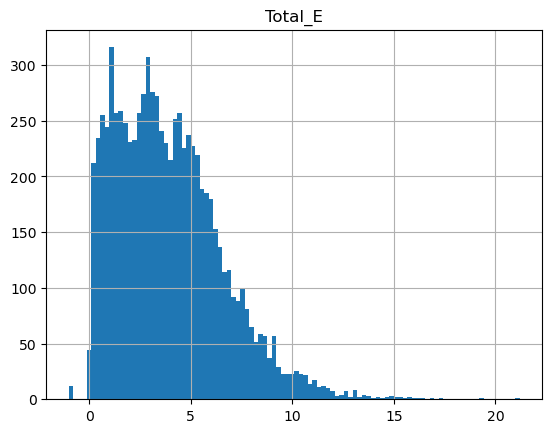

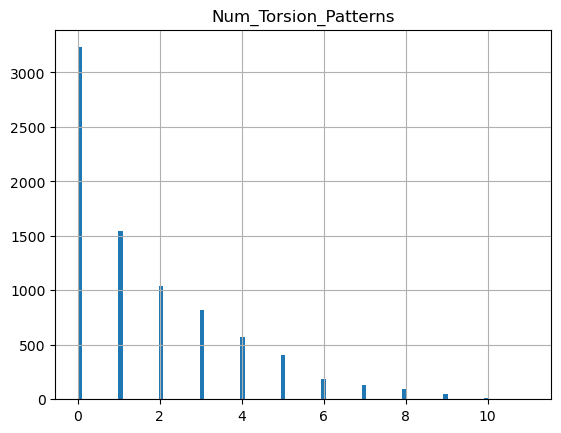

In [14]:
# Reset the style to the default one
plt.style.use("default")
# Plot a histogram of Total_E in strain_df
strain_df.hist(column="Total_E", bins=100)
# Plot a histogram of Num_Torsion_Patterns in strain_df
strain_df.hist(column="Num_Torsion_Patterns", bins=100)

In [7]:
# Display summary statistics for strain_df
strain_df.describe()

,Total_E,Lower_Bound,Upper_Bound,Num_Torsion_Patterns
count,8092.000000,8092.000000,6182.000000,8092.000000
mean,3.914235,3.310321,inf,1.706253
std,2.622748,2.215572,NaN,2.046088
min,-1.000000,-0.052459,0.000000,0.000000
25%,1.834325,1.526378,1.702342,0.000000
50%,3.539718,3.016913,3.504214,1.000000
75%,5.482144,4.666935,5.753137,3.000000
max,21.201249,17.144768,inf,11.000000


In [13]:
# Create a new df, "merge", by merging df and strain_df on Name and Molecule_Name
merge = pd.merge(df, strain_df, left_on='Name', right_on='Molecule_Name')
merge.head()

,Name,Molecule,Chiral Flag,LigandID,PDBid,Resid,Chain,3-letter-code,LigandSmiles,Resolution,EDIAm,Pfam_Identifier,Molecule_Name,Total_E,Lower_Bound,Upper_Bound,Num_Torsion_Patterns
0,0A9_3QGO_A_407,<rdkit.Chem.rdchem.Mol object at 0x1327ee840>,1,0A9_3QGO_A_407,3QGO,407,A,0A9,COC(=O)[C@H](Cc1ccccc1)N,1.45,0.92,"Thermolysin metallopeptidase, catalytic domain",0A9_3QGO_A_407,0.995784,0.920369,1.074808,1.0
1,0B1_3VV7_A_509,<rdkit.Chem.rdchem.Mol object at 0x1327ee8e0>,1,0B1_3VV7_A_509,3VV7,509,A,0B1,CN1C(=O)C=C(N=C1N)[C@H]2C[C@H]2c3cccc(c3)c4ccc...,2.10,0.84,Eukaryotic aspartyl protease,0B1_3VV7_A_509,1.670944,1.557695,1.791850,3.0
2,0B3_3WB4_A_507,<rdkit.Chem.rdchem.Mol object at 0x1327ee980>,1,0B3_3WB4_A_507,3WB4,507,A,0B3,C[C@]1(CC(=O)N(C(=N1)N)C)CCc2ccccc2,2.25,0.86,Eukaryotic aspartyl protease,0B3_3WB4_A_507,2.090036,2.013647,2.171805,0.0
3,0B5_5YGX_A_509,<rdkit.Chem.rdchem.Mol object at 0x1327eea20>,1,0B5_5YGX_A_509,5YGX,509,A,0B5,C[C@]1([C@H]([C@H](OC(=N1)N)C(C)(F)F)F)c2cc(cc...,2.20,0.97,Eukaryotic aspartyl protease,0B5_5YGX_A_509,6.000205,5.370271,7.085769,1.0
4,0BI_3K5C_B_387,<rdkit.Chem.rdchem.Mol object at 0x1327eeac0>,1,0BI_3K5C_B_387,3K5C,387,B,0BI,CC(C)c1cccc(c1)C2(CC2)NC[C@H]([C@@H]3Cc4cccc(c...,2.12,0.89,Eukaryotic aspartyl protease,0BI_3K5C_B_387,5.882324,5.033393,NaN,7.0


In [9]:
# Display the top 5 most strained molecules in merge by sorting on Total_E
display(merge.sort_values(by='Total_E', ascending=False).head())

most_strained = merge.sort_values(by='Total_E', ascending=False).head()

,Name,Molecule,Chiral Flag,LigandID,PDBid,Resid,Chain,3-letter-code,LigandSmiles,Resolution,EDIAm,Pfam_Identifier,Molecule_Name,Total_E,Lower_Bound,Upper_Bound,Num_Torsion_Patterns
1681,9TR_6AAC_A_505,<rdkit.Chem.rdchem.Mol object at 0x15091b560>,1,9TR_6AAC_A_505,6AAC,505,A,9TR,c1cc(cc(c1)N=[N+]=[N-])COC(=O)NCCCC[C@@H](C(=O...,1.48,0.80,tRNA synthetases class II core domain (F),9TR_6AAC_A_505,21.201249,17.144768,NaN,11.0
6287,OCC_2HAR_A_1001,<rdkit.Chem.rdchem.Mol object at 0x1523da4d0>,1,OCC_2HAR_A_1001,2HAR,1001,A,OCC,C[C@H](CCCC(C)(C)O)[C@H]1CC[C@@H]\2[C@@]1(CCC/...,1.90,0.98,Ligand-binding domain of nuclear hormone receptor,OCC_2HAR_A_1001,19.351867,16.245815,NaN,6.0
3233,BNG_4N4D_B_203,<rdkit.Chem.rdchem.Mol object at 0x1509c9e40>,1,BNG_4N4D_B_203,4N4D,203,B,BNG,CCCCCCCCCO[C@H]1[C@@H]([C@H]([C@@H]([C@H](O1)C...,2.40,0.83,None,BNG_4N4D_B_203,17.225442,14.476561,NaN,9.0
4023,EJV_6C3H_A_502,<rdkit.Chem.rdchem.Mol object at 0x15231d6c0>,1,EJV_6C3H_A_502,6C3H,502,A,EJV,CCCCCCCc1ccc(cc1)C(=O)O,1.71,0.90,Cytochrome P450,EJV_6C3H_A_502,16.761365,13.401761,NaN,3.0
2622,AG3_2E5W_A_1001,<rdkit.Chem.rdchem.Mol object at 0x150985e40>,1,AG3_2E5W_A_1001,2E5W,1001,A,AG3,[H]/N=C(/N)\NCCCCNCCCN,2.00,0.94,Spermidine synthase tetramerisation domain,AG3_2E5W_A_1001,16.418880,14.311881,NaN,2.0


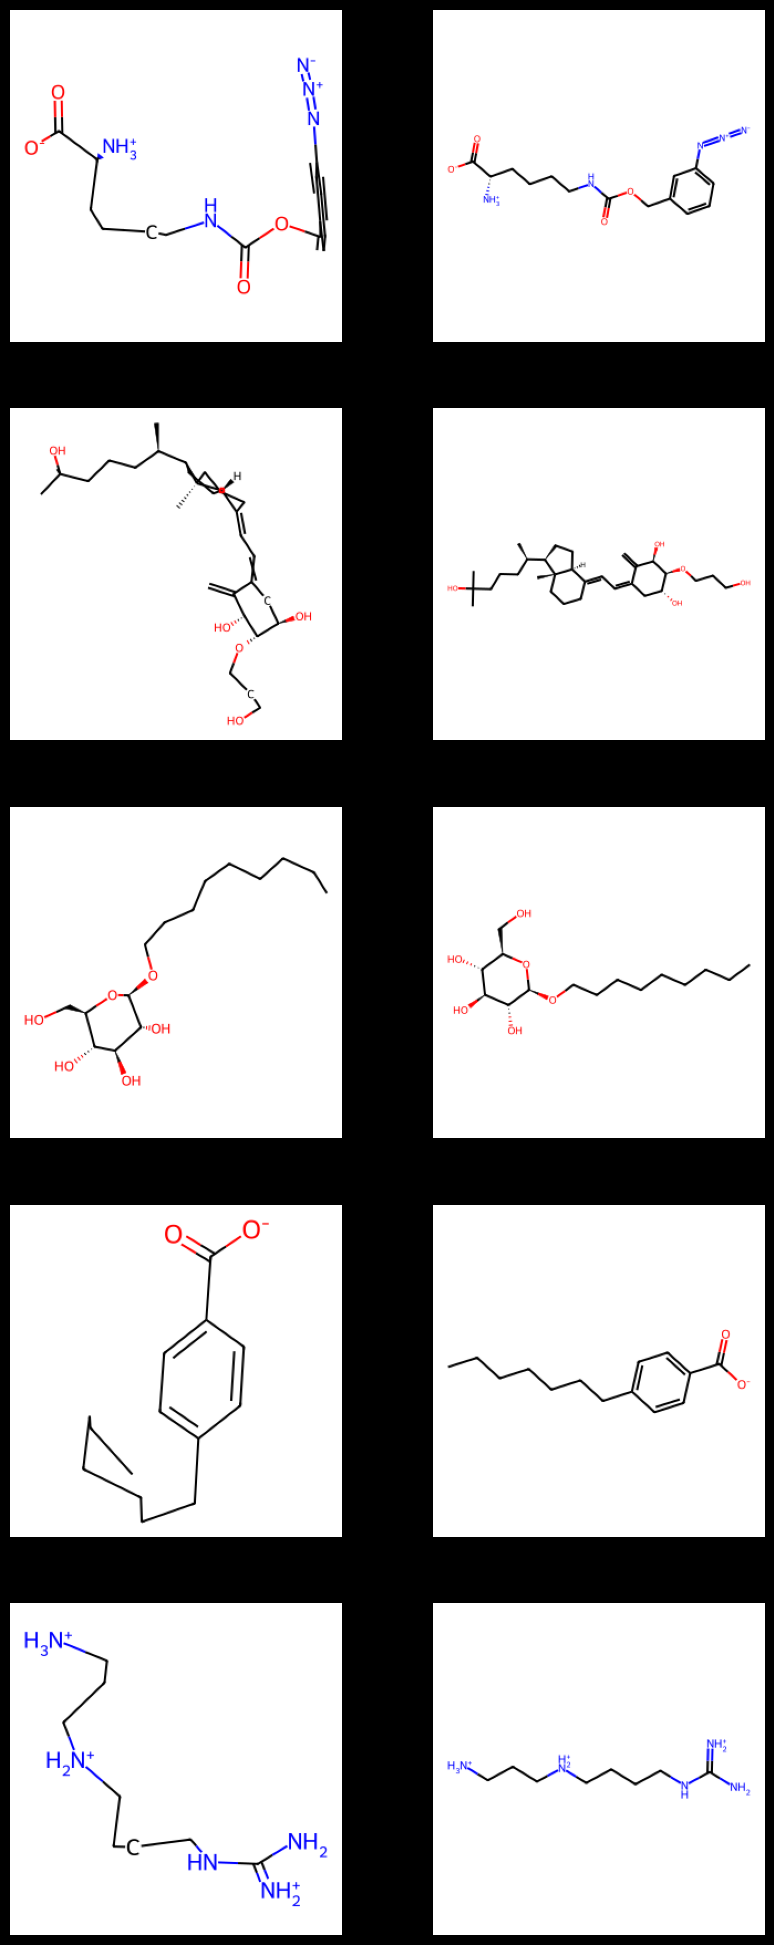

In [11]:
# Determine the number of molecules
num_mols = len(most_strained)

# Create a grid of subplots
fig, axs = plt.subplots(num_mols, 2, figsize=(10, num_mols*5))

# Loop over the molecules in the DataFrame
for idx, (i, row) in enumerate(most_strained.iterrows()):
    mol = row['Molecule']
    
    # Generate a 3D depiction of the molecule
    img_3d = Draw.MolToImage(mol)
    
    # Create a deep copy of the molecule
    mol_2d = Chem.MolFromMolBlock(Chem.MolToMolBlock(mol))
    
    # Generate 2D coordinates for the copy of the molecule
    rdDepictor.Compute2DCoords(mol_2d)
    
    # Generate a 2D depiction of the copy of the molecule
    img_2d = Draw.MolToImage(mol_2d)
    
    # Display the 3D image in the first column of the current row
    axs[idx, 0].imshow(img_3d)
    axs[idx, 0].axis('off')
    
    # Display the 2D image in the second column of the current row
    axs[idx, 1].imshow(img_2d)
    axs[idx, 1].axis('off')

# Display the grid of images
plt.show()